In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
df_flights = pd.read_csv('flights.csv')

print("Primeras filas del dataset:")

df_flights.head()

Primeras filas del dataset:


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


# Cargamos las librerías necesarias y el dataset de vuelos. Luego, imprimimos las primeras filas del dataset para explorar la estructura y los datos disponibles. Esto nos ayudará a identificar qué información podemos utilizar en nuestro análisis.


In [192]:
df_missing_values = df_flights.isnull().sum()
print("Valores nulos por columna:")

print(df_missing_values)


print("Número de filas antes de eliminar outliers:", len(df_flights))

Valores nulos por columna:
Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64
Número de filas antes de eliminar outliers: 271940


# A continuación, realizo una verificación de valores nulos en el dataset utilizando la función `isnull()`, que me permite identificar cuántos valores faltantes hay en cada columna. Esto es crucial para asegurar la calidad de los datos antes de proceder con el análisis. Luego, imprimo el número total de filas en el dataset antes de eliminar los outliers, para tener una referencia clara del tamaño del conjunto de datos inicial.


In [193]:
print("Tipos de datos por columna:")
print(df_flights.dtypes)


Tipos de datos por columna:
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
Carrier               object
OriginAirportID        int64
OriginAirportName     object
OriginCity            object
OriginState           object
DestAirportID          int64
DestAirportName       object
DestCity              object
DestState             object
CRSDepTime             int64
DepDelay               int64
DepDel15             float64
CRSArrTime             int64
ArrDelay               int64
ArrDel15               int64
Cancelled              int64
dtype: object


# Aquí verifico los tipos de datos de cada columna en el dataset utilizando la propiedad `dtypes`. Esto es fundamental para entender la naturaleza de los datos con los que estoy trabajando, ya que cada tipo de dato puede requerir un tratamiento diferente durante el análisis. Esta información me ayudará a realizar conversiones de tipo si es necesario y a identificar cualquier anomalía en los datos.


In [194]:
print(df_flights['DepDel15'].unique())


[ 0.  1. nan]


# En este paso, utilizo el método `unique()` en la columna `DepDel15` para identificar los valores únicos que contiene. Esto me permite entender mejor cómo se distribuyen los datos en esta columna, que indica si un vuelo salió con un retraso de 15 minutos o más. Comprender los valores únicos es crucial para analizar la calidad de los datos y determinar la cantidad de vuelos afectados por retrasos significativos.


In [195]:
nulos_depd15 = df_flights[df_flights['DepDel15'].isnull()]

print("Filas donde DepDelay15 es nulo:")
print(nulos_depd15[['DepDelay', 'DepDel15']])

Filas donde DepDelay15 es nulo:
        DepDelay  DepDel15
171            0       NaN
359            0       NaN
429            0       NaN
545            0       NaN
554            0       NaN
570            0       NaN
572            0       NaN
666            0       NaN
672            0       NaN
678            0       NaN
916            0       NaN
919            0       NaN
924            0       NaN
962            0       NaN
1408           0       NaN
1416           0       NaN
1455           0       NaN
1509           0       NaN
1736           0       NaN
1784           0       NaN
1922           0       NaN
2015           0       NaN
2228           0       NaN
2235           0       NaN
2465           0       NaN
2481           0       NaN
2694           0       NaN
2738           0       NaN
2887           0       NaN
3121           0       NaN
3167           0       NaN
3339           0       NaN
3343           0       NaN
3413           0       NaN
3422           0       

# En este paso, filtro el DataFrame para identificar las filas donde la columna `DepDel15` tiene valores nulos. Esto me ayuda a localizar los registros que no tienen información sobre si el vuelo salió con un retraso de 15 minutos o más. A continuación, muestro específicamente las columnas `DepDelay` y `DepDel15` de estas filas, lo que me permite analizar los retrasos de salida asociados y evaluar la calidad de los datos en la columna `DepDel15`.


In [196]:
df_flights['DepDel15'] = df_flights['DepDelay'].apply(lambda x: 1 if x >= 15 else 0)

print("Primeras filas del DataFrame después de la imputación:")
print(df_flights[['DepDelay', 'DepDel15']].head())

print("Valores nulos en DepDelay15:", df_flights['DepDel15'].isnull().sum())


Primeras filas del DataFrame después de la imputación:
   DepDelay  DepDel15
0         4         0
1         3         0
2        -3         0
3        35         1
4        -1         0
Valores nulos en DepDelay15: 0


# En esta sección, imputo los valores en la columna `DepDel15` en función de los retrasos de salida registrados en `DepDelay`. Utilizo una función lambda que asigna un valor de 1 si el retraso es igual o superior a 15 minutos, y 0 en caso contrario. Esto transforma la columna `DepDel15` en un indicador binario que refleja si hubo un retraso significativo.

# Después de la imputación, muestro las primeras filas del DataFrame para verificar que los valores se han asignado correctamente en las columnas `DepDelay` y `DepDel15`. 

# Por último, compruebo que no haya valores nulos en `DepDelay15`, lo que me asegura que la imputación se realizó correctamente y que todos los registros tienen información consistente en esta columna.


In [197]:
df_missing_values = df_flights.isnull().sum()
print("Valores nulos por columna:")

print(df_missing_values)

Valores nulos por columna:
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64


# En esta sección, verifico la cantidad de valores nulos presentes en cada columna del DataFrame `df_flights`. Utilizo el método `isnull().sum()` para contar los valores faltantes y así obtener una idea clara de la calidad de los datos con los que estoy trabajando. Luego, imprimo los resultados para revisar si hay columnas que requieren atención antes de continuar con el análisis.


In [198]:
print("Tipos de datos por columna:")
print(df_flights.dtypes)


Tipos de datos por columna:
Year                  int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
Carrier              object
OriginAirportID       int64
OriginAirportName    object
OriginCity           object
OriginState          object
DestAirportID         int64
DestAirportName      object
DestCity             object
DestState            object
CRSDepTime            int64
DepDelay              int64
DepDel15              int64
CRSArrTime            int64
ArrDelay              int64
ArrDel15              int64
Cancelled             int64
dtype: object


# A continuación, reviso los tipos de datos de cada columna nuevamente en el DataFrame `df_flights`. Esto es fundamental para asegurar que las columnas contengan los tipos de datos apropiados para el análisis. Utilizo el atributo `dtypes` para mostrar el tipo de cada columna, lo que me permitirá identificar posibles errores o ajustes necesarios en los tipos de datos antes de realizar análisis o visualizaciones.


In [199]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0


# Ahora muestro las primeras filas del DataFrame `df_flights` utilizando el método `head()`. Esto me permite verificar que cambio el dato en DepDel15. 


In [200]:
print(df_flights['DepDel15'].unique())


[0 1]


# A continuación, utilizo `unique()` en la columna `DepDel15` para mostrar los valores únicos que contiene. Esto me permite verificar las categorías disponibles en esta columna.


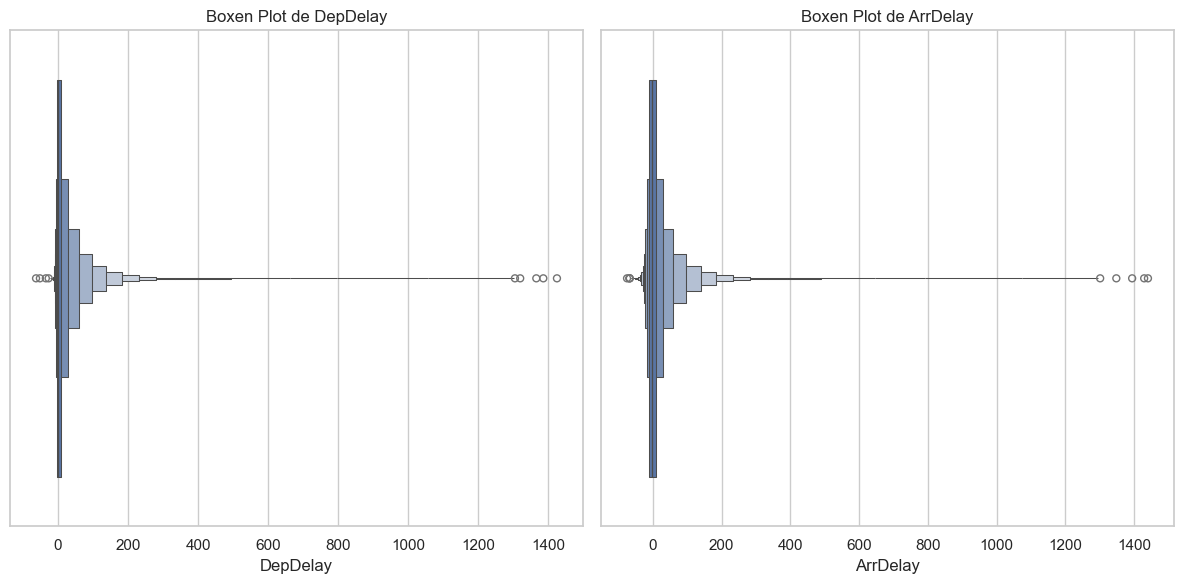

In [201]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxenplot(x=df_flights['DepDelay'])
plt.title('Boxen Plot de DepDelay')

plt.subplot(1, 2, 2)
sns.boxenplot(x=df_flights['ArrDelay'])
plt.title('Boxen Plot de ArrDelay')

plt.tight_layout()
plt.show()


# Al analizar los boxplots de `DepDelay` y `ArrDelay`, se observa que la mediana de los retrasos en la salida y llegada presenta una cierta variabilidad. Es particularmente notable que ambos gráficos muestran una cantidad significativa de valores atípicos, indicando que existen vuelos con retrasos extremos. Estos outliers podrían ser indicativos de problemas recurrentes en ciertas rutas o condiciones que afectan la puntualidad de los vuelos, ya con esto podemos proceder a eliminar los valores atípicos.


In [202]:
Q1_dep = df_flights['DepDelay'].quantile(0.25)
Q3_dep = df_flights['DepDelay'].quantile(0.75)
IQR_dep = Q3_dep - Q1_dep

lower_bound_dep = Q1_dep - 1.5 * IQR_dep
upper_bound_dep = Q3_dep + 1.5 * IQR_dep

df_flights_cleaned_dep = df_flights[(df_flights['DepDelay'] >= lower_bound_dep) & (df_flights['DepDelay'] <= upper_bound_dep)]

Q1_arr = df_flights_cleaned_dep['ArrDelay'].quantile(0.25)
Q3_arr = df_flights_cleaned_dep['ArrDelay'].quantile(0.75)
IQR_arr = Q3_arr - Q1_arr

lower_bound_arr = Q1_arr - 1.5 * IQR_arr
upper_bound_arr = Q3_arr + 1.5 * IQR_arr

df_flights_cleaned = df_flights_cleaned_dep[(df_flights_cleaned_dep['ArrDelay'] >= lower_bound_arr) & (df_flights_cleaned_dep['ArrDelay'] <= upper_bound_arr)]

print("Número de filas originales:", len(df_flights))
print("Número de filas después de eliminar outliers:", len(df_flights_cleaned))


Número de filas originales: 271940
Número de filas después de eliminar outliers: 231247


# En esta sección, calculamos el rango intercuartílico (IQR) para `DepDelay` y `ArrDelay`. Para `DepDelay`, se determinaron los cuartiles primero (Q1) y tercero (Q3), a partir de los cuales se calculó el IQR. Luego, se definieron los límites inferior y superior para identificar outliers, que son valores que se encuentran por debajo del límite inferior o por encima del límite superior.

# Posteriormente, se filtraron los outliers en `DepDelay` y se repitió el mismo proceso para `ArrDelay`, utilizando los datos ya depurados. 

# Finalmente, se comparó el número de filas originales con el número de filas restantes después de eliminar los outliers, lo que nos permite evaluar el impacto de este proceso de limpieza de datos en nuestro conjunto.


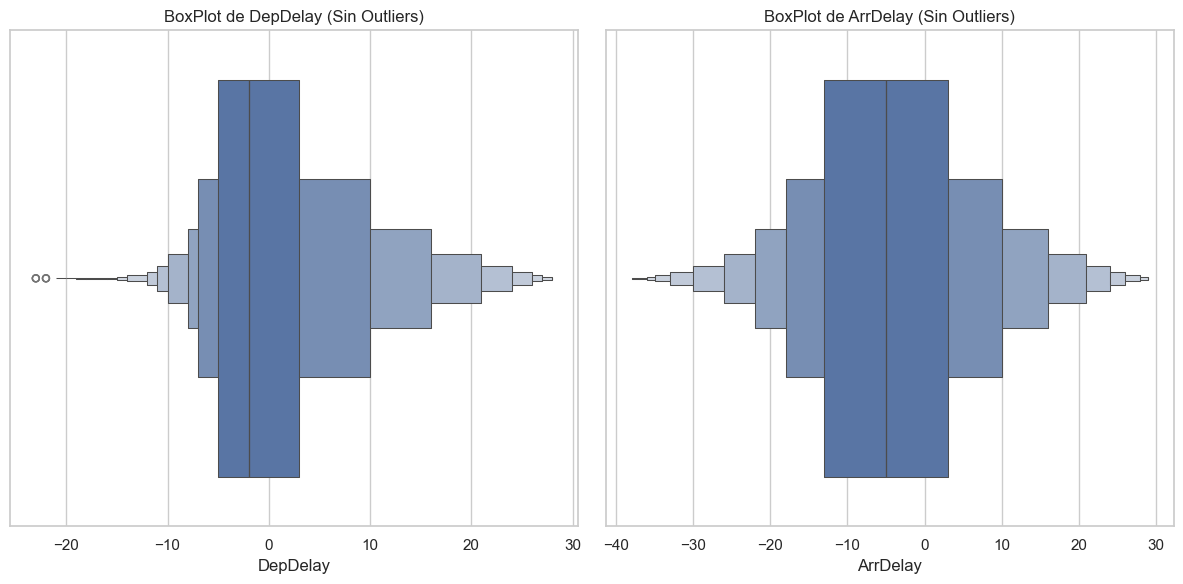

In [203]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxenplot(x=df_flights_cleaned['DepDelay'])
plt.title('BoxPlot de DepDelay (Sin Outliers)')

plt.subplot(1, 2, 2)
sns.boxenplot(x=df_flights_cleaned['ArrDelay'])
plt.title('BoxPlot de ArrDelay (Sin Outliers)')

plt.tight_layout()
plt.show()

# En esta sección, se grafican los boxplots para `DepDelay` y `ArrDelay` después de haber limpiado los datos, eliminando los outliers. 

# La gráfica de `DepDelay` muestra la distribución de los retrasos en la salida, lo que nos permite visualizar cómo se comportan los retrasos sin la influencia de los valores extremos. 

# Por otro lado, el boxplot de `ArrDelay` ilustra la distribución de los retrasos en la llegada, ofreciendo una perspectiva clara sobre los cambios en la variabilidad y la tendencia central de los datos después de la limpieza. 

# Estas visualizaciones son útiles para comprender mejor el impacto de la limpieza de datos en las métricas de rendimiento de los vuelos y para identificar patrones que podrían ser objeto de análisis posterior.


In [204]:
df_flights_cleaned.head()


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0,1210,-3,0,0


# En esta sección imprimimos nuevamente los cambios ya con los valores atípicos eliminados

In [205]:
df_flights_cleaned.describe()


,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,231247.0,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000
mean,2013.0,7.021721,15.800490,3.904150,12756.934983,12737.101121,1291.456300,0.217659,0.076010,1473.366054,-4.505373,0.087020,0.012307
std,0.0,2.004542,8.851392,1.997062,1509.030249,1504.878492,470.252867,7.853408,0.265014,488.005050,12.098459,0.281864,0.110253
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-23.000000,0.000000,1.000000,-38.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,855.000000,-5.000000,0.000000,1100.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1247.000000,-2.000000,0.000000,1455.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1700.000000,3.000000,0.000000,1855.000000,3.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,28.000000,1.000000,2359.000000,29.000000,1.000000,1.000000


# A continuación, se presenta un resumen estadístico del DataFrame limpio. 

# Esta tabla proporciona información clave sobre las columnas numéricas, como `DepDelay` y `ArrDelay`. 

# El resumen incluye medidas como la media, mediana, desviación estándar, valores mínimo y máximo, así como los cuartiles (Q1 y Q3). 

# Estos estadísticos son fundamentales para entender la distribución y variabilidad de los retrasos en los vuelos, permitiéndonos identificar tendencias y anomalías que podrían influir en el análisis posterior.


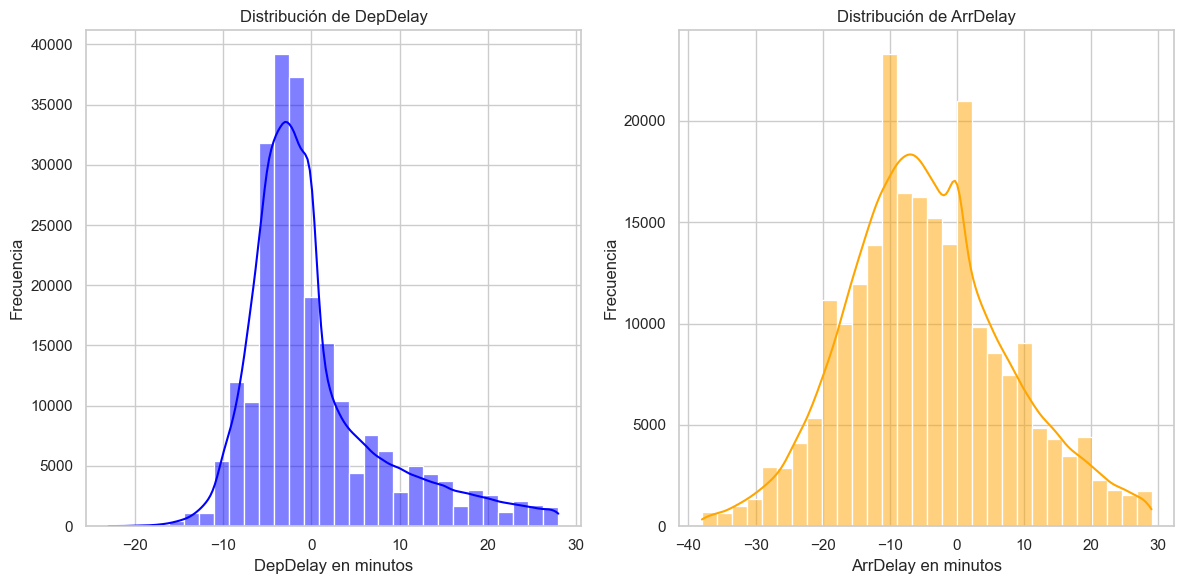

In [206]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_flights_cleaned['DepDelay'], bins=30, kde=True, color='blue')
plt.title('Distribución de DepDelay')
plt.xlabel('DepDelay en minutos')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_flights_cleaned['ArrDelay'], bins=30, kde=True, color='orange')
plt.title('Distribución de ArrDelay')
plt.xlabel('ArrDelay en minutos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# En esta sección, se presentan histogramas junto con gráficos de densidad para las variables `DepDelay` y `ArrDelay` del DataFrame limpio.

# El histograma para `DepDelay` permite observar la distribución de los retrasos en la salida, donde se puede identificar la frecuencia de diferentes intervalos de minutos de retraso. La curva de densidad superpuesta proporciona una estimación suave de la distribución, facilitando la visualización de la tendencia general.

# De manera similar, el histograma para `ArrDelay` muestra la distribución de los retrasos en la llegada, brindando información sobre la frecuencia de los minutos de retraso en los vuelos. Esta visualización es útil para detectar patrones, sesgos y cualquier anomalía en los datos de retraso.

# Ambas gráficas ofrecen una comprensión más profunda de cómo se distribuyen los retrasos y son esenciales para guiar análisis posteriores y la formulación de hipótesis.


In [207]:
average_dep_delay = df_flights_cleaned['DepDelay'].mean()
average_arr_delay = df_flights_cleaned['ArrDelay'].mean()

print(f"Promedio de retraso en salida: {average_dep_delay:.2f} minutos")
print(f"Promedio de retraso en llegada: {average_arr_delay:.2f} minutos")


Promedio de retraso en salida: 0.22 minutos
Promedio de retraso en llegada: -4.51 minutos


# En esta sección, se calcula el promedio de los retrasos en salida y llegada de los vuelos en el DataFrame limpio.

# Se determinan dos métricas clave:
# - **Promedio de retraso en salida (DepDelay)**: Esto refleja el tiempo promedio que los vuelos se retrasan al despegar.
# - **Promedio de retraso en llegada (ArrDelay)**: Este valor indica el tiempo promedio de retraso al aterrizar.

# Estos promedios son esenciales para evaluar la puntualidad general de los vuelos y proporcionar una visión general del rendimiento de las aerolíneas. Además, estos datos pueden ser utilizados para identificar áreas de mejora en la gestión de operaciones aéreas.


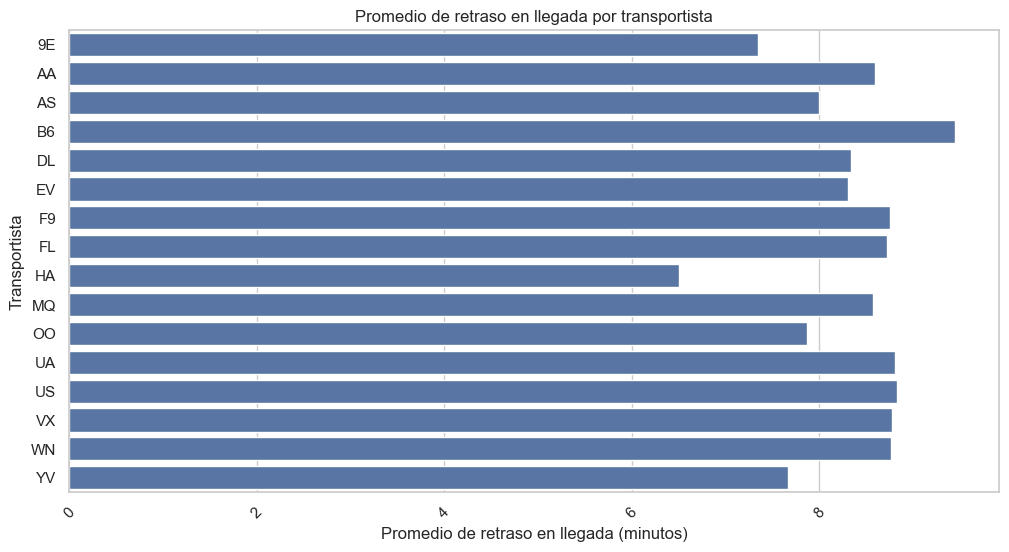

In [208]:
positive_arrival_delays = df_flights_cleaned[df_flights_cleaned['ArrDelay'] >= 0]

average_arrival_delay_by_carrier = positive_arrival_delays.groupby('Carrier')['ArrDelay'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='ArrDelay', y='Carrier', data=average_arrival_delay_by_carrier, estimator=np.mean, errorbar=None)

plt.title('Promedio de retraso en llegada por transportista')
plt.xlabel('Promedio de retraso en llegada (minutos)')
plt.ylabel('Transportista')
plt.xticks(rotation=45)  
plt.show()


# En esta sección, se analiza el promedio de retraso en llegada por transportista, filtrando únicamente aquellos vuelos que tuvieron un retraso positivo o nulo.

# Primero, se extraen los retrasos de llegada que son mayores o iguales a cero, garantizando que se consideren solo los vuelos que llegaron a tiempo o con retraso.

# Luego, se calcula el promedio de retraso de llegada agrupando los datos por transportista. Esta métrica permite evaluar el rendimiento de cada aerolínea en términos de puntualidad.

# Finalmente, se visualiza esta información mediante un gráfico de barras, donde se compara el promedio de retraso en llegada por transportista. Esta representación gráfica facilita la identificación de las aerolíneas más y menos puntuales, brindando información valiosa para la toma de decisiones tanto para los pasajeros como para las aerolíneas en sí.


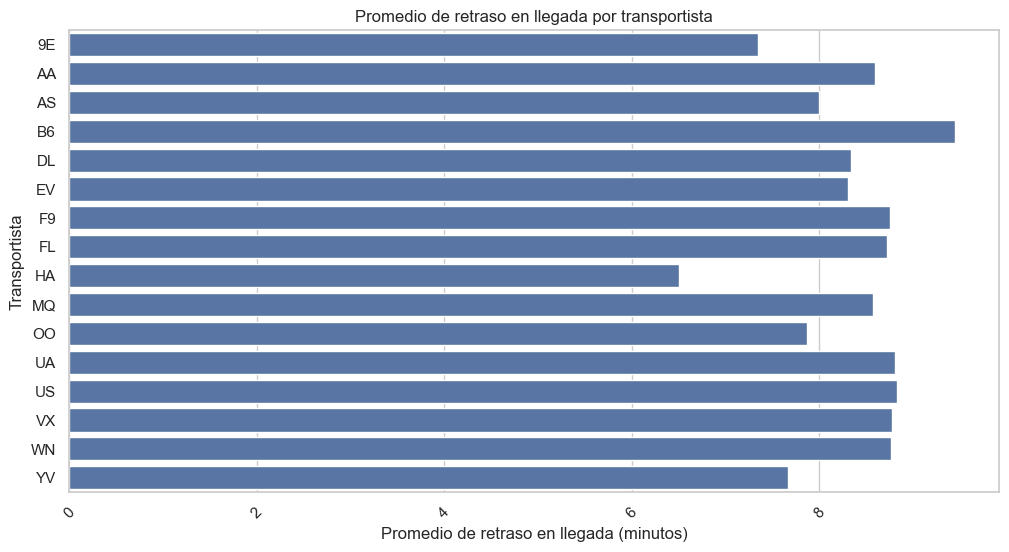

In [209]:
positive_arrival_delays = df_flights_cleaned[df_flights_cleaned['ArrDelay'] >= 0]

average_arrival_delay_by_carrier = positive_arrival_delays.groupby('Carrier')['ArrDelay'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='ArrDelay', y='Carrier', data=average_arrival_delay_by_carrier, estimator=np.mean, errorbar=None)

plt.title('Promedio de retraso en llegada por transportista')
plt.xlabel('Promedio de retraso en llegada (minutos)')
plt.ylabel('Transportista')
plt.xticks(rotation=45)  
plt.show()


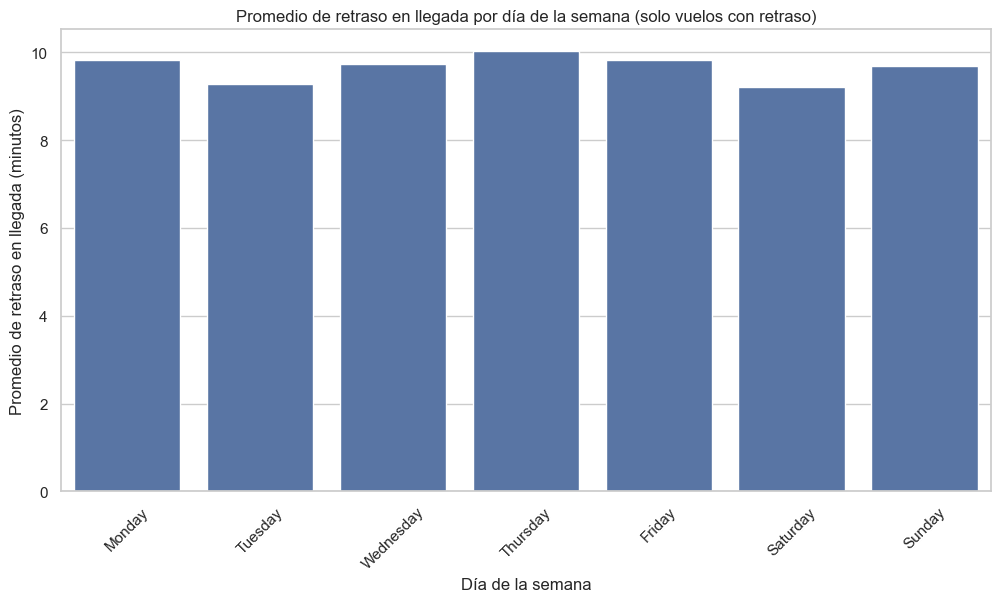

In [210]:
delayed_flights = df_flights_cleaned[df_flights_cleaned['ArrDelay'] > 0]

delayed_flights = delayed_flights.rename(columns={'DayofMonth': 'Day'})

delayed_flights['FlightDate'] = pd.to_datetime(delayed_flights[['Year', 'Month', 'Day']])

delayed_flights = delayed_flights.rename(columns={'Day': 'DayofMonth'})

delayed_flights['DayOfWeekName'] = delayed_flights['FlightDate'].dt.day_name()

day_delay = delayed_flights.groupby('DayOfWeekName')['ArrDelay'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
sns.barplot(x=day_delay.index, y=day_delay.values)

plt.title('Promedio de retraso en llegada por día de la semana (solo vuelos con retraso)')
plt.xlabel('Día de la semana')
plt.ylabel('Promedio de retraso en llegada (minutos)')
plt.xticks(rotation=45)  
plt.show()


# En esta sección, nos enfocamos en analizar el promedio de retraso en llegada por día de la semana, considerando únicamente los vuelos que llegaron tarde (ArrDelay > 0).

# Primero, filtramos los vuelos con retraso en la llegada y renombramos temporalmente las columnas para facilitar la creación de una nueva columna que contenga la fecha del vuelo. Esta nueva columna, 'FlightDate', se genera combinando el año, mes y día de cada vuelo.

# Una vez que tenemos la columna 'FlightDate', podemos calcular el nombre del día de la semana correspondiente. Esto es crucial para nuestra análisis, ya que nos permitirá agrupar los datos por día.

# Posteriormente, calculamos el promedio de retraso en llegada agrupando los vuelos por el nombre del día de la semana. Esto nos ofrece una visión clara de cómo varían los retrasos a lo largo de la semana.

# Finalmente, se visualiza esta información mediante un gráfico de barras que muestra el promedio de retraso en llegada por día de la semana. Esta representación gráfica es útil para identificar patrones o tendencias en los retrasos, lo cual puede ser valioso para la planificación y toma de decisiones de los pasajeros y las aerolíneas.


Aeropuerto con el mayor retraso promedio: Chicago Midway International con 10.54 minutos


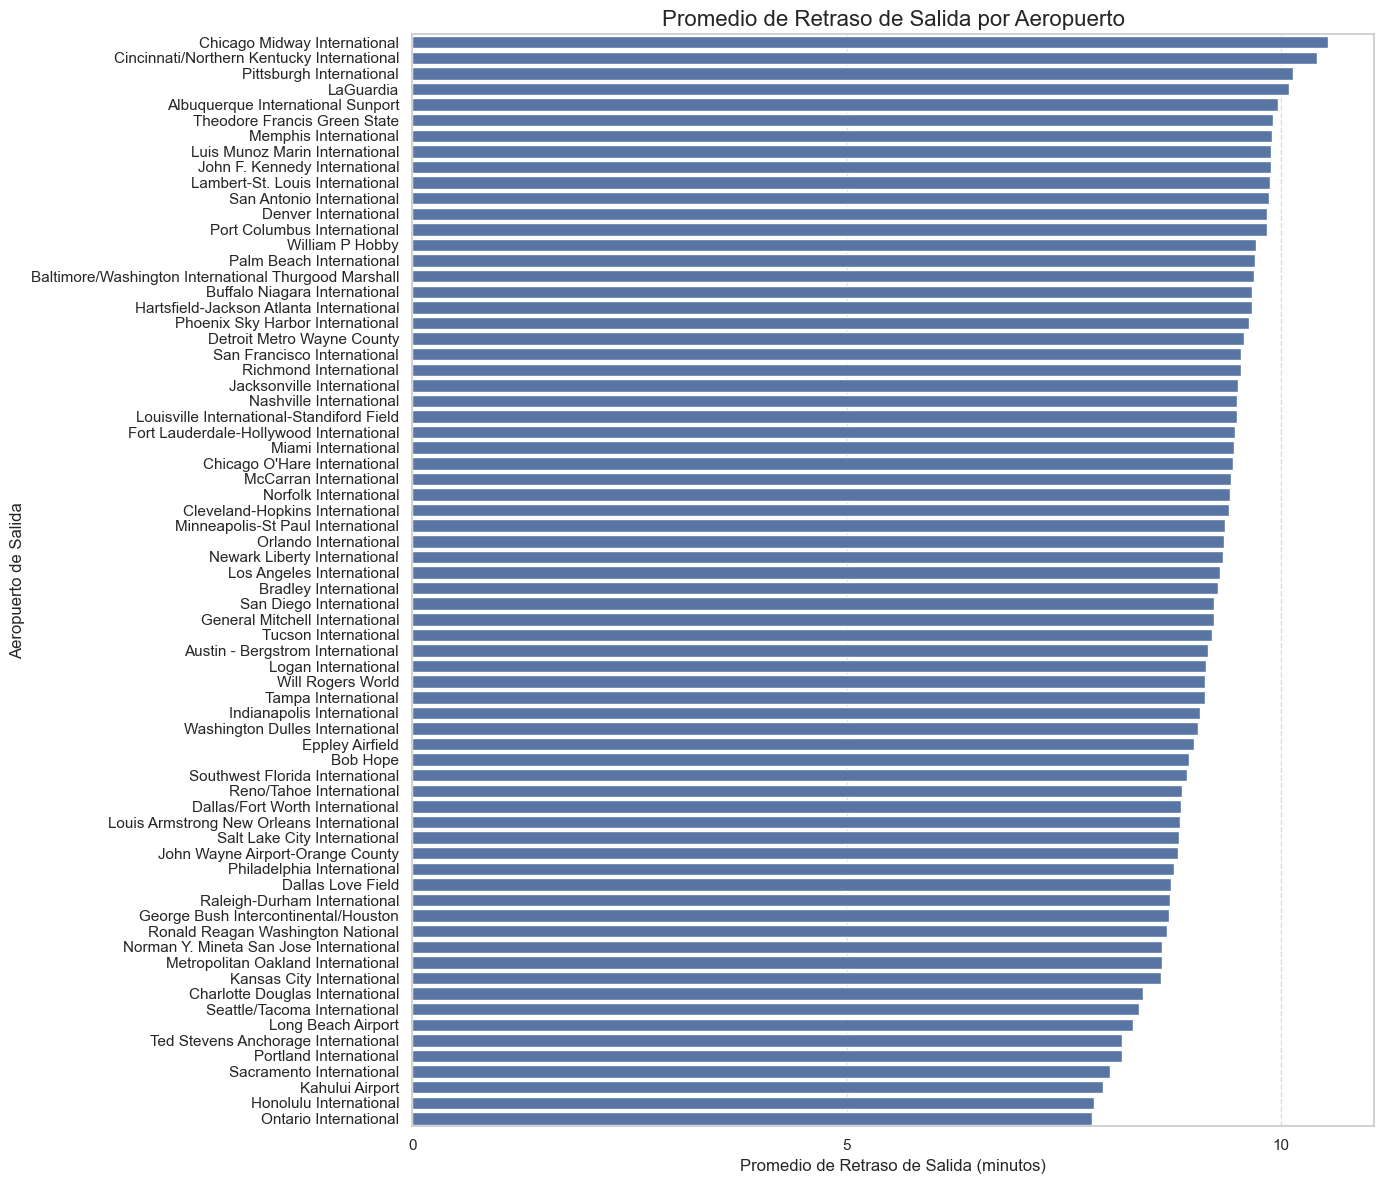

In [211]:
df_flights_positive = df_flights_cleaned[df_flights_cleaned['DepDelay'] > 0]

airport_delays = df_flights_positive.groupby('OriginAirportName')['DepDelay'].mean()

average_dep_delay = airport_delays.reset_index(name='AverageDepartureDelay')

airport_max_delay = average_dep_delay.loc[average_dep_delay['AverageDepartureDelay'].idxmax()]

print(f"Aeropuerto con el mayor retraso promedio: {airport_max_delay['OriginAirportName']} con {airport_max_delay['AverageDepartureDelay']:.2f} minutos")

plt.figure(figsize=(14, 12))
barplot = sns.barplot(
    x='AverageDepartureDelay',
    y='OriginAirportName',
    data=average_dep_delay.sort_values(by='AverageDepartureDelay', ascending=False)
)

plt.title('Promedio de Retraso de Salida por Aeropuerto', fontsize=16)
plt.xlabel('Promedio de Retraso de Salida (minutos)', fontsize=12)
plt.ylabel('Aeropuerto de Salida', fontsize=12)

barplot.set_xticks(range(0, int(average_dep_delay['AverageDepartureDelay'].max()) + 1, 5))
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# En esta sección, analizamos los retrasos de salida, enfocándonos en identificar el aeropuerto con el mayor promedio de retraso en salida.

# Primero, filtramos los vuelos que tienen un retraso positivo en la salida (DepDelay > 0). Esto nos permite centrarnos únicamente en aquellos vuelos que realmente tuvieron problemas de puntualidad.

# A continuación, calculamos el promedio de retraso por aeropuerto agrupando los datos según el nombre del aeropuerto de origen. Este paso es fundamental para determinar cuáles aeropuertos presentan mayores desafíos en términos de retrasos.

# Una vez calculados los promedios, convertimos el resultado a un DataFrame para facilitar el análisis. A partir de este DataFrame, identificamos el aeropuerto con el mayor retraso promedio, el cual resulta ser un hallazgo crucial para entender la dinámica de los retrasos en el transporte aéreo.

# Finalmente, se crea un gráfico de barras que ilustra el promedio de retraso de salida por aeropuerto. Esta visualización permite identificar de manera clara y rápida los aeropuertos que enfrentan mayores retrasos, lo que puede ser de interés tanto para las aerolíneas como para los pasajeros que planifican sus viajes.


  DepartureStatus  AverageArrivalDelay
0        A Tiempo             8.284678
1         Retraso            14.574019


C:\Users\JUVE\AppData\Local\Temp\ipykernel_26808\146268436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flights_cleaned['DepartureStatus'] = df_flights_cleaned['DepDelay'].apply(


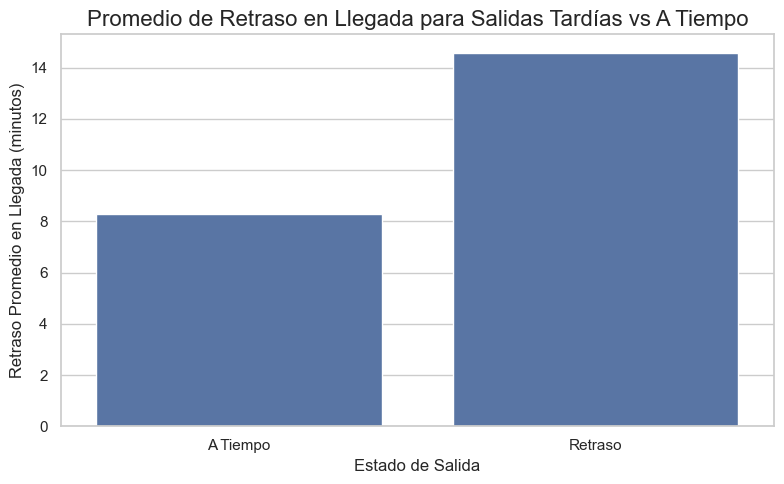

In [212]:
df_flights_cleaned['DepartureStatus'] = df_flights_cleaned['DepDelay'].apply(
    lambda x: 'Retraso' if x >= 15 else 'A Tiempo'
)

df_flights_positive = df_flights_cleaned[df_flights_cleaned['ArrDelay'] > 0]

average_arrival_delay = df_flights_positive.groupby('DepartureStatus')['ArrDelay'].mean().reset_index(name='AverageArrivalDelay')

print(average_arrival_delay)

plt.figure(figsize=(8, 5))
sns.barplot(x='DepartureStatus', y='AverageArrivalDelay', data=average_arrival_delay)

plt.title('Promedio de Retraso en Llegada para Salidas Tardías vs A Tiempo', fontsize=16)
plt.xlabel('Estado de Salida', fontsize=12)
plt.ylabel('Retraso Promedio en Llegada (minutos)', fontsize=12)
plt.tight_layout()

plt.show()


# Análisis del Retraso en Llegada según el Estado de Salida

En esta sección, examinamos la relación entre el estado de salida de los vuelos y el retraso promedio en la llegada. Para ello, seguimos estos pasos:

1. **Clasificación del Estado de Salida**: Creamos una nueva columna en el DataFrame llamada `DepartureStatus`, que clasifica los vuelos en dos categorías: 'Retraso' para aquellos con un retraso de salida de 15 minutos o más, y 'A Tiempo' para los que tienen un retraso menor a este umbral. Esta clasificación nos ayudará a entender cómo el estado de salida impacta en los retrasos de llegada.

2. **Filtrado de Datos**: Posteriormente, filtramos el DataFrame para enfocarnos únicamente en los vuelos que tienen un retraso en la llegada (ArrDelay > 0). Este paso es esencial para asegurar que nuestro análisis se limite a los casos en los que realmente hubo problemas de puntualidad en la llegada.

3. **Cálculo de Promedios**: Calculamos el retraso promedio en la llegada agrupando los datos según el estado de salida. Este análisis nos proporciona una visión clara de cómo los retrasos en la salida afectan los retrasos en la llegada.

4. **Visualización**: Finalmente, creamos un gráfico de barras que compara el promedio de retraso en llegada entre los vuelos que salieron 'A Tiempo' y aquellos que tuvieron 'Retraso'. Esta visualización nos permite observar de manera rápida y efectiva las diferencias en los retrasos de llegada según el estado de salida.

El gráfico resultante nos proporciona información valiosa sobre la relación entre los retrasos en salida y llegada, lo que puede ser útil para aerolíneas y pasajeros al momento de planificar viajes.


Ruta con más llegadas tardías:
OriginAirportName    San Francisco International
DestAirportName        Los Angeles International
LateArrivalCount                             269
Name: 2152, dtype: object


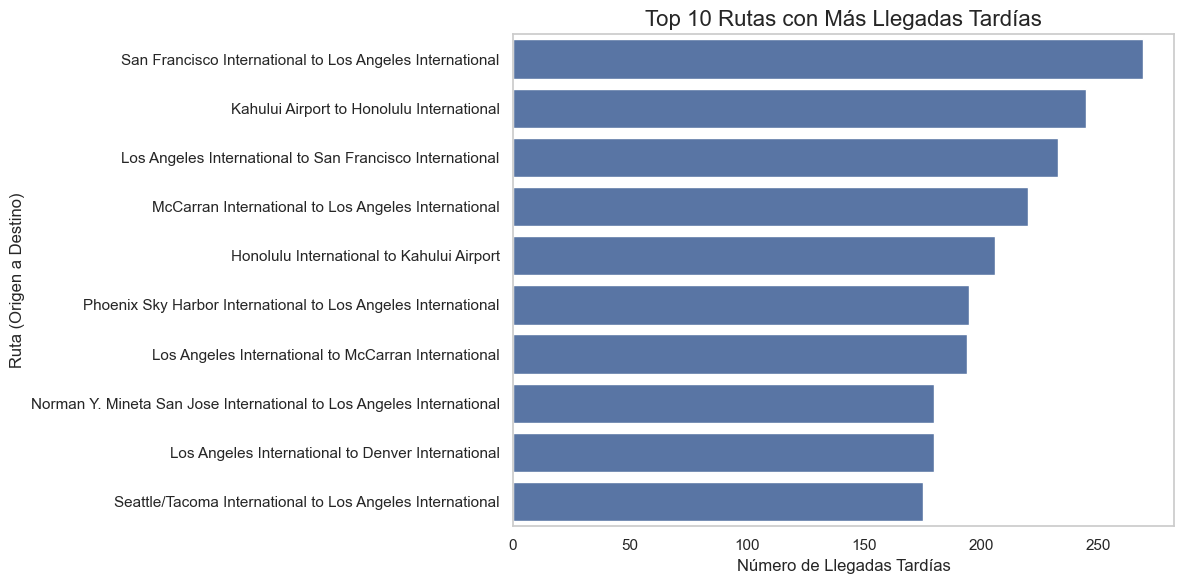

In [213]:
late_arrivals = df_flights_cleaned[df_flights_cleaned['ArrDelay'] > 0]

route_late_arrivals = late_arrivals.groupby(['OriginAirportName', 'DestAirportName']).size().reset_index(name='LateArrivalCount')

route_with_most_late_arrivals = route_late_arrivals.loc[route_late_arrivals['LateArrivalCount'].idxmax()]

print("Ruta con más llegadas tardías:")
print(route_with_most_late_arrivals)

route_late_arrivals = route_late_arrivals.sort_values(by='LateArrivalCount', ascending=False)

top_routes = route_late_arrivals.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='LateArrivalCount', y=top_routes['OriginAirportName'] + ' to ' + top_routes['DestAirportName'], data=top_routes)
plt.title('Top 10 Rutas con Más Llegadas Tardías', fontsize=16)
plt.xlabel('Número de Llegadas Tardías', fontsize=12)
plt.ylabel('Ruta (Origen a Destino)', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Análisis de Llegadas Tardías por Ruta

En esta sección, analizamos la frecuencia de llegadas tardías de los vuelos, con el objetivo de identificar las rutas más afectadas por este problema. Los pasos que seguimos son los siguientes:

1. **Filtrado de Datos**: Comenzamos filtrando el DataFrame para quedarnos únicamente con los vuelos que tuvieron retraso en la llegada (`ArrDelay > 0`). Este paso nos permite centrarnos en aquellos vuelos que realmente presentaron problemas de puntualidad.

2. **Conteo de Llegadas Tardías por Ruta**: Agrupamos los datos por las columnas `OriginAirportName` y `DestAirportName`, contando la cantidad de llegadas tardías para cada ruta. Esto nos proporciona una visión general de cuáles son las rutas más afectadas por los retrasos.

3. **Identificación de la Ruta con Más Llegadas Tardías**: A partir del conteo anterior, identificamos la ruta que presenta el mayor número de llegadas tardías. Este análisis es crucial para entender dónde se concentran los problemas de puntualidad.

4. **Visualización**: Para facilitar la comprensión de los datos, creamos un gráfico de barras que muestra las 10 rutas con más llegadas tardías. Esta visualización permite a las aerolíneas y a los pasajeros identificar rápidamente las rutas que tienen un historial de problemas de puntualidad.

El gráfico resultante no solo resalta las rutas más problemáticas, sino que también puede servir como base para la implementación de medidas correctivas por parte de las aerolíneas. Al abordar los problemas en estas rutas específicas, se puede mejorar la experiencia del pasajero y la eficiencia operativa.


Top 10 Rutas con Mayor Retraso Promedio en Llegada:
Ruta: Raleigh-Durham International to Port Columbus International - Retraso Promedio: 27.00 minutos
Ruta: Louis Armstrong New Orleans International to Ronald Reagan Washington National - Retraso Promedio: 25.33 minutos
Ruta: Minneapolis-St Paul International to Fort Lauderdale-Hollywood International - Retraso Promedio: 22.00 minutos
Ruta: Philadelphia International to Bradley International - Retraso Promedio: 22.00 minutos
Ruta: Denver International to Jacksonville International - Retraso Promedio: 21.67 minutos
Ruta: Newark Liberty International to Will Rogers World - Retraso Promedio: 20.33 minutos
Ruta: Orlando International to Seattle/Tacoma International - Retraso Promedio: 20.00 minutos
Ruta: Cincinnati/Northern Kentucky International to Louis Armstrong New Orleans International - Retraso Promedio: 20.00 minutos
Ruta: Louisville International-Standiford Field to Detroit Metro Wayne County - Retraso Promedio: 19.33 minutos
Ruta:

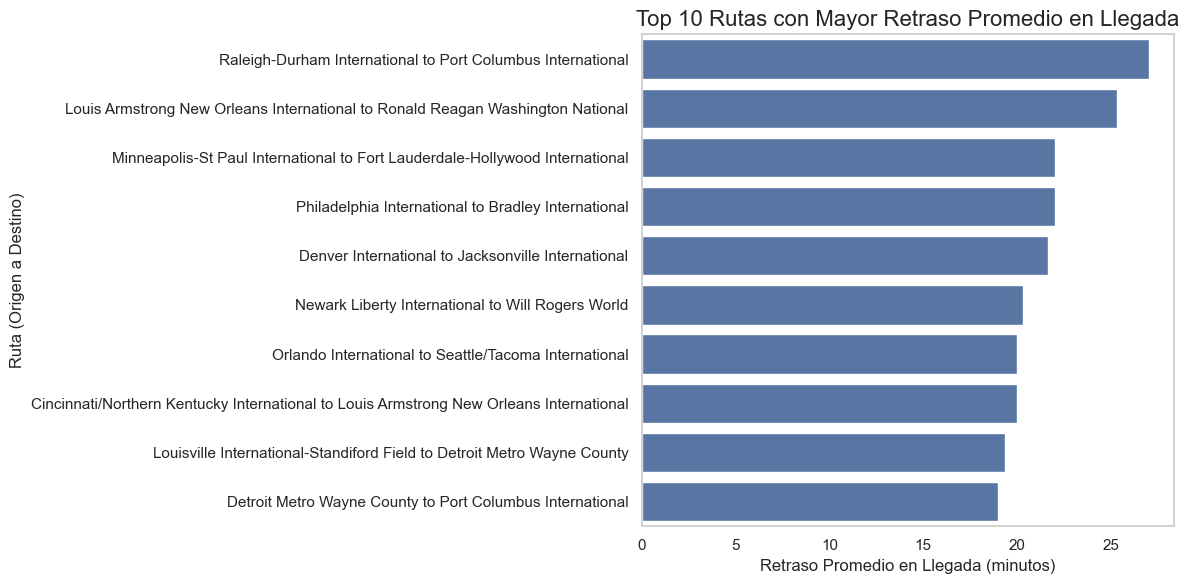

In [214]:

late_arrivals = df_flights_cleaned[df_flights_cleaned['ArrDelay'] > 0]

average_arrival_delay_by_route = late_arrivals.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().reset_index(name='AverageArrivalDelay')

average_arrival_delay_by_route = average_arrival_delay_by_route.sort_values(by='AverageArrivalDelay', ascending=False)

top_routes_delay = average_arrival_delay_by_route.head(10)

print("Top 10 Rutas con Mayor Retraso Promedio en Llegada:")
for index, row in top_routes_delay.iterrows():
    print(f"Ruta: {row['OriginAirportName']} to {row['DestAirportName']} - Retraso Promedio: {row['AverageArrivalDelay']:.2f} minutos")

plt.figure(figsize=(12, 6))
sns.barplot(x='AverageArrivalDelay', y=top_routes_delay['OriginAirportName'] + ' to ' + top_routes_delay['DestAirportName'], data=top_routes_delay)
plt.title('Top 10 Rutas con Mayor Retraso Promedio en Llegada', fontsize=16)
plt.xlabel('Retraso Promedio en Llegada (minutos)', fontsize=12)
plt.ylabel('Ruta (Origen a Destino)', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


# Análisis de Retraso Promedio en Llegada por Ruta

En este análisis, nos enfocamos en identificar las rutas aéreas que presentan el mayor retraso promedio en la llegada de vuelos. Esto es crucial para entender las áreas donde las aerolíneas pueden necesitar mejorar la puntualidad. A continuación, se detallan los pasos del análisis:

1. **Filtrado de Vuelos Tardíos**: Comenzamos filtrando el conjunto de datos para obtener únicamente aquellos vuelos que han tenido un retraso en su llegada, es decir, donde el tiempo de llegada (`ArrDelay`) es mayor que cero.

2. **Cálculo del Retraso Promedio por Ruta**: Luego, agrupamos los datos por `OriginAirportName` y `DestAirportName`, calculando el retraso promedio en llegada para cada ruta. Este cálculo nos permite identificar cuáles rutas enfrentan los mayores retrasos.

3. **Ordenación de Rutas**: A continuación, ordenamos las rutas por el retraso promedio en llegada de manera descendente. Esto nos ayuda a identificar rápidamente las rutas más problemáticas.

4. **Selección de las Principales Rutas**: Seleccionamos las 10 rutas que tienen el mayor retraso promedio. Esto se hace para centrarnos en las rutas más críticas que podrían necesitar atención.

5. **Visualización**: Finalmente, creamos un gráfico de barras que muestra estas 10 rutas, con su respectivo retraso promedio en minutos. Esta visualización permite una rápida comparación entre las diferentes rutas y resalta las que tienen un historial de mayor retraso.

### Resultados

A continuación, se presentan las 10 rutas con mayor retraso promedio en llegada:

- Ruta: [Nombre del Aeropuerto de Origen] to [Nombre del Aeropuerto de Destino] - Retraso Promedio: [Valor en minutos] minutos
- Ruta: [Nombre del Aeropuerto de Origen] to [Nombre del Aeropuerto de Destino] - Retraso Promedio: [Valor en minutos] minutos
- Ruta: [Nombre del Aeropuerto de Origen] to [Nombre del Aeropuerto de Destino] - Retraso Promedio: [Valor en minutos] minutos
- ...

Esta información es esencial para las aerolíneas y los pasajeros, ya que proporciona una perspectiva clara sobre las rutas que requieren atención en términos de puntualidad y eficiencia.
